In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_treino_2017 = pd.read_csv('isic_2017_treino.csv')
df_treino_2018 = pd.read_csv('isic_2018_treino.csv')

In [2]:
# tratando 2017
df_treino_2017.head()

,image_id,melanoma,seborrheic_keratosis
0,ISIC_0000000,0.0,0.0
1,ISIC_0000001,0.0,0.0
2,ISIC_0000002,1.0,0.0
3,ISIC_0000003,0.0,0.0
4,ISIC_0000004,1.0,0.0


In [3]:
# adicionando extensão aos nomes dos arquivos
df_treino_2017['image_id'] = df_treino_2017['image_id'].apply(lambda x: x + '.jpg')

# criando flag para nevus
df_treino_2017['nevus'] = ((df_treino_2017.melanoma == 0) & 
                           (df_treino_2017.seborrheic_keratosis == 0)).astype(float)

df_treino_2017.drop('seborrheic_keratosis', axis = 1, inplace = True)
df_treino_2017.head()

,image_id,melanoma,nevus
0,ISIC_0000000.jpg,0.0,1.0
1,ISIC_0000001.jpg,0.0,1.0
2,ISIC_0000002.jpg,1.0,0.0
3,ISIC_0000003.jpg,0.0,1.0
4,ISIC_0000004.jpg,1.0,0.0


In [4]:
# shape original (sem filtro)
df_treino_2017.shape

(2000, 3)

In [5]:
# as imagens precisam ser ou nevus ou melanoma
df_treino_2017 = df_treino_2017.loc[(df_treino_2017['melanoma'] == 1) | (df_treino_2017['nevus'] == 1)]

In [6]:
# após filtrar por caso, novo shape
df_treino_2017.shape

(1746, 3)

In [7]:
# minha pasta 'isic_2017_treino' possui 450 imagens (algumas destas, não são nevus ou melanoma)

dir_treino_17 = r'C:\Users\fkhon\Documents\LETSCODE\MODULO9\projeto_m9_1311\isic_2017_treino'
dir_treino_17_filenames = [name for name in os.listdir(dir_treino_17)]
len(dir_treino_17_filenames)

450

In [8]:
# eliminarei do descritivo, os nomes que não constam na pasta 'isic_2017_treino'
df_treino_2017 = \
  df_treino_2017.loc[df_treino_2017['image_id'].isin(dir_treino_17_filenames)]

In [9]:
# agora, cada nome de 'df_treino_2017' possui correspondência na pasta 'isic_2017_treino'
df_treino_2017.shape

(397, 3)

In [10]:
# precisamos de mais imagens de melanoma (balanceamento)
df_treino_2017.melanoma.value_counts()

0.0    306
1.0     91
Name: melanoma, dtype: int64

In [11]:
# tratando 2018
df_treino_2018.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# tratando nomes (adicionando extensões aos nomes) e filtrando series 
df_treino_2018 = df_treino_2018[['image', 'MEL', 'NV']]
df_treino_2018['image'] = df_treino_2018['image'].apply(lambda x: x + '.jpg')

# verificando correspondência entre descritivo e pasta
dir_treino_18 = r'C:\Users\fkhon\Documents\LETSCODE\MODULO9\projeto_m9_1311\isic_2018_treino'
dir_treino_18_filenames = [name for name in os.listdir(dir_treino_18)]
len(dir_treino_18_filenames)

10015

In [13]:
df_treino_2018.head()

,image,MEL,NV
0,ISIC_0024306.jpg,0.0,1.0
1,ISIC_0024307.jpg,0.0,1.0
2,ISIC_0024308.jpg,0.0,1.0
3,ISIC_0024309.jpg,0.0,1.0
4,ISIC_0024310.jpg,1.0,0.0


In [14]:
df_treino_2018.shape

(10015, 3)

In [15]:
# imagens precisam ser ou nevus ou melanoma
df_treino_2018 = df_treino_2018.loc[(df_treino_2018['MEL'] == 1) | (df_treino_2018['NV'] == 1)]

In [16]:
df_treino_2018.shape

(7818, 3)

In [17]:
df_treino_2018['MEL'].value_counts()

0.0    6705
1.0    1113
Name: MEL, dtype: int64

In [18]:
print(df_treino_2017.columns)
print(df_treino_2018.columns)

Index(['image_id', 'melanoma', 'nevus'], dtype='object')
Index(['image', 'MEL', 'NV'], dtype='object')


In [19]:
# unificar nomes das series, para eventual concat
df_treino_2018.columns = ['img', 'pos', 'neg']
df_treino_2017.columns = ['img', 'pos', 'neg']

In [20]:
# juntar as duas bases, a fim de somar 1200 imagens de cada caso
# para tanto, somarei os casos positivos de 2017 aos de 2018, e eliminarei de 2018, casos negativos
# suficientes para que o total se equipare ao de positivos

# separando casos positivos e negativos de cada ano
pos_2018 = df_treino_2018.loc[df_treino_2018['pos'] == 1]
pos_2017 = df_treino_2017.loc[df_treino_2017['pos'] == 1]

neg_2018 = df_treino_2018.loc[df_treino_2018['neg'] == 1]
neg_2017 = df_treino_2017.loc[df_treino_2017['neg'] == 1]

# juntando casos positivos e negativos de todos os anos
full_pos = pd.concat([pos_2017, pos_2018], axis = 0)
full_neg = pd.concat([neg_2017, neg_2018], axis = 0)

In [21]:
print(full_pos.shape)
print(full_neg.shape)

(1204, 3)
(7011, 3)


In [22]:
# amostrando aleatoriamente, 1204 dados negativos, estes consistirão nas observações negativas (a amostragem
# é feita para separar um número de imagens equivalente ao número de imagens positivas que temos à disposição)
full_neg = full_neg.sample(n = full_pos.shape[0], random_state = 123)

In [23]:
full_pos.shape == full_neg.shape

True

In [24]:
full_pos = full_pos[['img', 'pos']]
full_neg = full_neg[['img', 'pos']]

filenames = pd.concat([full_pos, full_neg]).reset_index().drop('index', axis = 1)

In [25]:
filenames['pos'].value_counts()

0.0    1204
1.0    1204
Name: pos, dtype: int64

In [26]:
filenames['img'].nunique()

2408

In [27]:
# para usar 'flow_from_directory' e 'ImageDataGenerator', utilizo como 'contraparte', a pasta '17n18_train',
# esta possui as imagens de treino de 2017 e 2018

aux = [name for name in os.listdir('17n18_train')]
len(aux)

In [33]:
# posso acessar as imagens correpondentes aos dados de filenames (contém nomes de arquivos a serem utilizados)
# na pasta '17n18_train'

for i in filenames['img']:
    if i not in aux:
        print('x')

In [36]:
# testar extração com slice de 'filenames'

sample = filenames.sample(50)

In [38]:
sample['pos'].value_counts()

0.0    33
1.0    17
Name: pos, dtype: int64

In [56]:
def get_images_n_labels(dataframe, i, j, path = '17n18_train/', series_name = 'img', label_name = 'pos'):
    
    x = []
    y = []
    
    for n in range(dataframe.shape[0]):
        img = cv2.imread(path + dataframe[series_name].iloc[n])
        img = cv2.resize(img, (i, j))
        
        x.append(img)
        y.append(dataframe[label_name].iloc[n])
        
    return np.array(x), np.array(y)
# https://stackoverflow.com/questions/25008458/how-to-apply-clahe-on-rgb-color-images
def bgr_CLAHE(img):
    
    bgr = img

    lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)

    lab_planes = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(6,6))

    lab_planes[0] = clahe.apply(lab_planes[0])

    lab = cv2.merge(lab_planes)

    bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    
    return bgr

In [57]:
x, y = get_images_n_labels(sample, 200, 200)

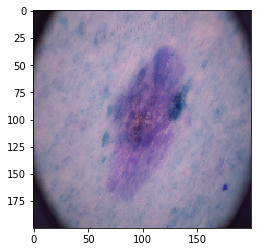

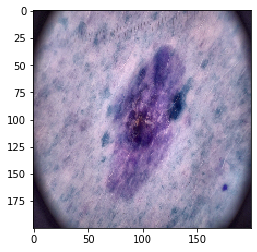

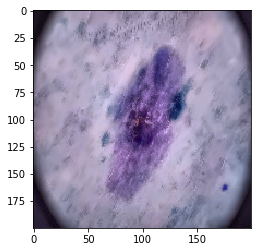

In [82]:
img = x[23]

plt.imshow(img)
plt.show()

img = bgr_CLAHE(img)
plt.imshow(img)
plt.show()

img = cv2.fastNlMeansDenoisingColored(img)
plt.imshow(img)
plt.show()